In [1]:
"""
Imports
"""
import json
import numpy as np
import pandas as pd

import sys
rootPath = '../'
sys.path.insert(0, rootPath+'Architecture/')
from groundTruth import GroundTruth
from statistics import Statistics
from dataManagement import Scaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""
Load configuration
"""
dataset = 'BGP_testbed_5'
config = json.loads(open(rootPath+'configuration.json').read())['datasets'][dataset]

In [3]:
"""
Load data
"""
node = 'spine1'
df = pd.read_csv(rootPath + config['directory']+node+config['filename'],
                 low_memory=False, dtype='float64', compression='gzip')\
        .dropna()  

scaler = Scaler()
dfNormalized = scaler.normalize(df)
print('Dataset shape: {}'.format(dfNormalized.shape))

Dataset shape: (1453, 85)


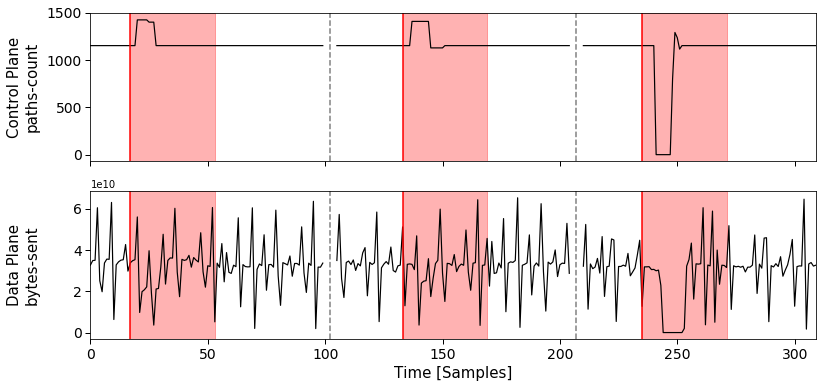

In [5]:
feature_cp = 'paths-count'
feature_dp = 'HundredGigE0/0/0/0_bytes-sent'

interval = 100
space_free = 5

index_1_start = 448
index_2_start = 763
index_3_start = 1090

event_1_start = 17
event_2_start = 133
event_3_start = 235

event_length = 36

index1 = list(range(index_1_start, index_1_start+interval))
index2 = list(range(index_2_start, index_2_start+interval))
index3 = list(range(index_3_start, index_3_start+interval))

fontsizeticks = 14
fontsizelabels = 15

subplots = 2

fig, ax = plt.subplots(subplots, sharex=True, figsize=(13,6))
for index, indexes in enumerate([index1, index2, index3]):
    
    ax[0].plot(range(interval*index+space_free*index, interval*index+space_free*index+interval), df.loc[indexes, feature_cp], c='k', linewidth=1.2)
    ax[1].plot(range(interval*index+space_free*index, interval*index+space_free*index+interval), df.loc[indexes, feature_dp], c='k', linewidth=1.2) 
    
    
ax[0].set_xlim(0,309)

for event_start in [event_1_start, event_2_start, event_3_start]:
    for axis_number in range(subplots):
        ax[axis_number].axvline(x=event_start, c='r')
        ax[axis_number].axvspan(event_start, event_start+event_length, color='r', alpha=0.3)

ax[0].tick_params(direction='out', length=5, width=1, colors='k',
               grid_color='r', grid_alpha=0.5, labelsize=fontsizeticks)        
ax[1].tick_params(direction='out', length=5, width=1, colors='k',
               grid_color='r', grid_alpha=0.5, labelsize=fontsizeticks)   
    

first_delimiter = 102
second_delimiter = 207

ax[0].axvline(x=first_delimiter, c='gray', linestyle = '--')
ax[1].axvline(x=first_delimiter, c='gray', linestyle = '--')

ax[0].axvline(x=second_delimiter, c='gray', linestyle = '--')
ax[1].axvline(x=second_delimiter, c='gray', linestyle = '--')

ax[0].set_ylabel('Control Plane\npaths-count', fontsize=fontsizelabels, )
ax[1].set_ylabel('Data Plane\nbytes-sent', fontsize=fontsizelabels) 
ax[1].set_xlabel('Time [Samples]', fontsize=fontsizelabels) 

ax[0].yaxis.set_label_coords(-0.07, 0.5)
ax[1].yaxis.set_label_coords(-0.07, 0.5)

fig.savefig('featuresExample.pdf', bbox_inches='tight')